In [32]:
# Using a comprehensive dataset on people who suffered from heart failure, we are going to see
# how successfully it can be predicted and whether it can be caught early
# First, read in the data and import our modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
patients = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\Heart failure prediction.csv")
patients.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [33]:
# Let's inspect the dataset to see if we have any null values
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


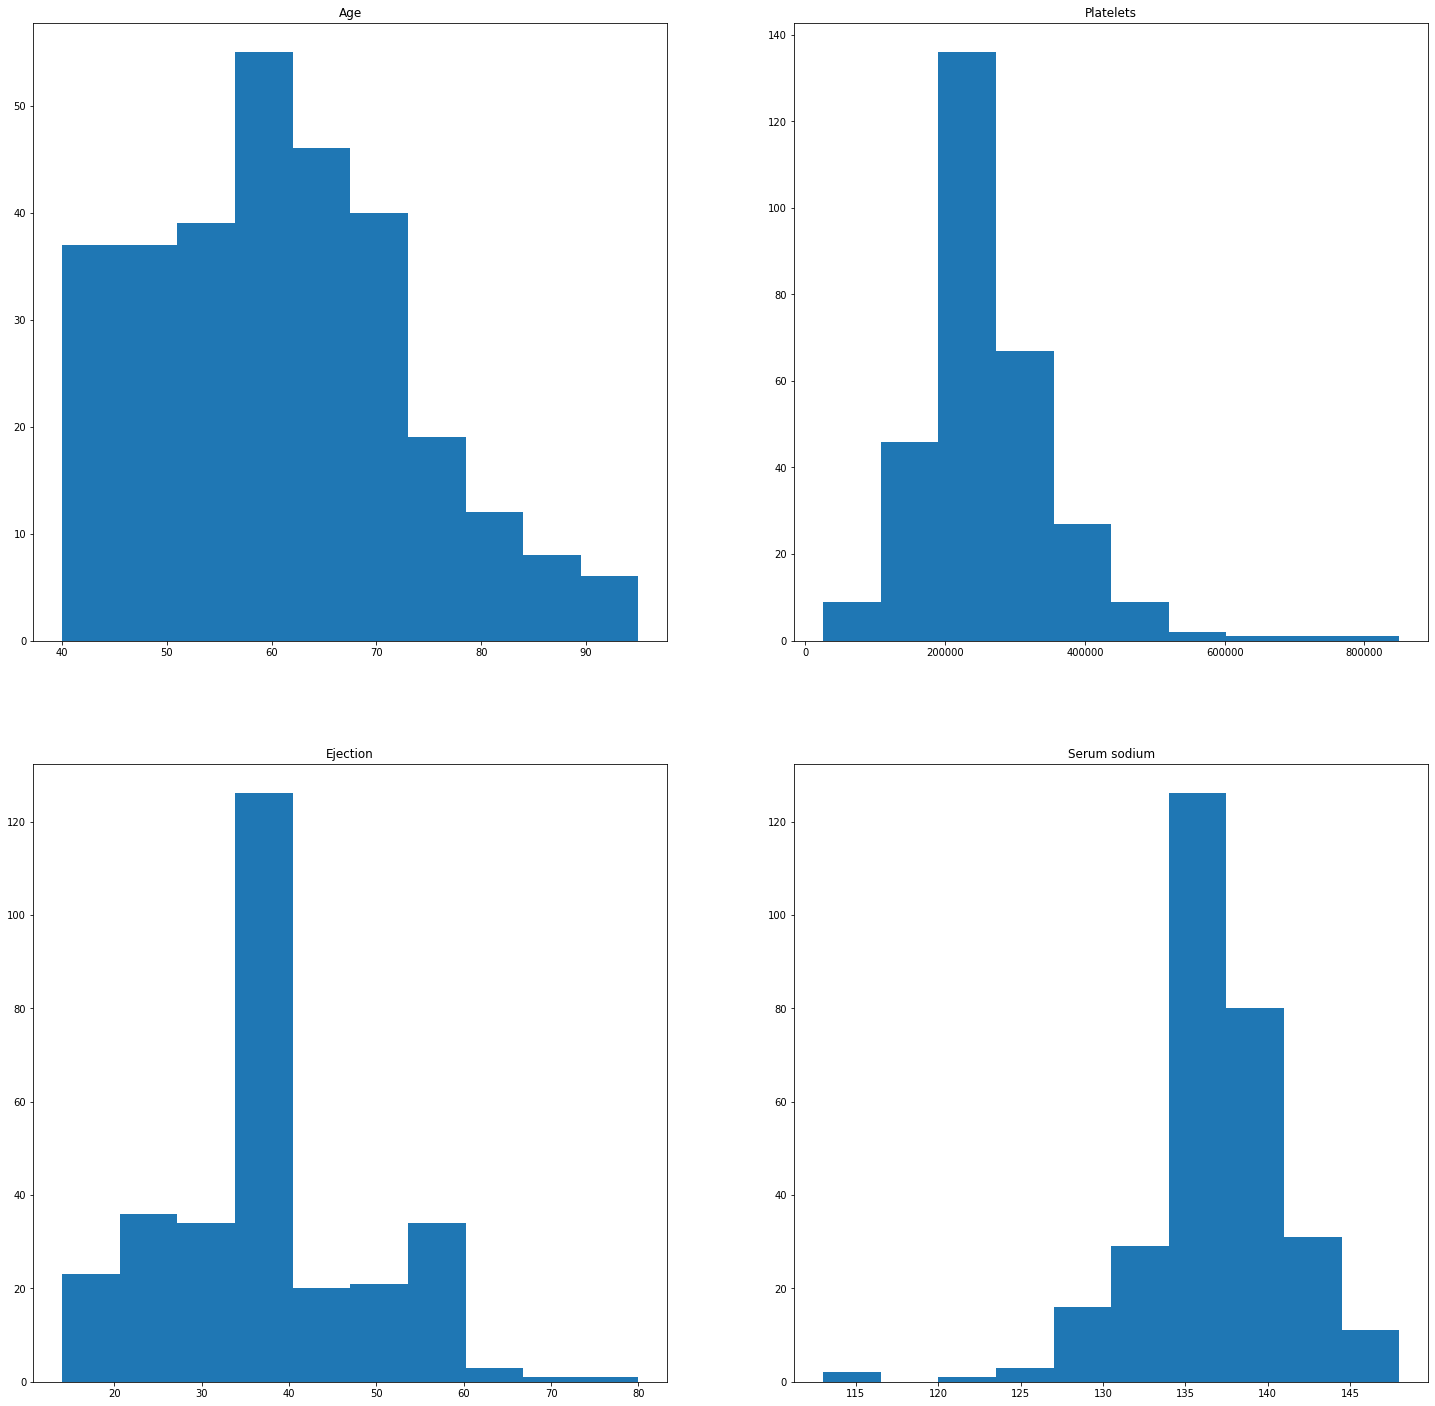

In [34]:
# No null values - this looks like a pretty comprehensive dataset. Now let's visualise some of our
# columns to we can see the distribution of the values:
fig, axs = plt.subplots(2,2, figsize=(25, 25))
axs[0,0].hist(patients["age"])
axs[0,0].set_title("Age")
axs[0,1].hist(patients["platelets"])
axs[0,1].set_title("Platelets")
axs[1,0].hist(patients["ejection_fraction"])
axs[1,0].set_title("Ejection")
axs[1,1].hist(patients["serum_sodium"])
axs[1,1].set_title("Serum sodium")
plt.show()

In [35]:
# We notice a few things here - our patients are between 40 and 90, and mostly under 60.Platelets is
# right-skewed whereas serum sodium is left skewed. Ejection's values are very much concentrated 
# between 35 and 40

In [36]:
# Let's look at what we might see as the more classic indicators for death by heart failure: age and sex
# First, let's see the average age of someone who died from heart failure
died = patients[patients["DEATH_EVENT"] == 1]
print("Average age of patients in study:", patients["age"].mean())
print("Average age of patient who died:", died["age"].mean())

Average age of patients in study: 60.83389297658862
Average age of patient who died: 65.21528125


In [37]:
# So, the average age of someone who actually died is about five years older than the average age of
# patients in the study - this is in line with expectations.
# Now let's see how sex correlates with DEATH_EVENT - typically we would expect men to suffer more 
# from heart failure, so we would perhaps expect to see higher deaths among men.
men = patients[patients["sex"] == 1]
women = patients[patients["sex"] == 0]
print("Number of women:", len(women))
print("Number of men:", len(men))

Number of women: 105
Number of men: 194


In [38]:
# We have more men in the study, i.e. more men who have suffered from heart failure (not surprising).
# However, do they then die more often than women?
men_died = len(men[men["DEATH_EVENT"] == 1])
women_died = len(women[women["DEATH_EVENT"] == 1])
proportion_men_died = (men_died/194) * 100
proportion_women_died = (women_died/105) * 100
print("Proportion of women who died:", proportion_women_died)
print("Proportion of men who died:", proportion_men_died)

Proportion of women who died: 32.38095238095238
Proportion of men who died: 31.958762886597935


In [39]:
# So, from this study, we would say that although more men suffer from heart failure, they are not
# more likely to die following that heart failure

In [40]:
# This dataset gives us lots of features to work with, however not all features are going to be
# immediately obvious in the general population. For example, how many people know the amunt of
# creatinine in their system? So, let's first see how effectively we can predict heart failure using a
# those features that are "obvious", or everyone will know about themselves: their age, their sex, 
# whether they smoke. We'll even leave out diabetes an anaemia for now, as they can go undiagnosed.

# This is a classification problem so we will need to use classification algorithms like decision trees
# and logistic regression
# Import the libraries we need to execute these classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier


In [41]:
accuracies = [] # empty list for the accuracy measurements for our different models
# Set up our train and test sets
features = ["age", "sex", "smoking"]
x = patients[features]
y = patients["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)
logistic = LogisticRegression() # instantiate the model
logistic.fit(x_train, y_train)
predictions = logistic.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.7833333333333333


In [42]:
# With simple logistic regression, and just these features, we can fairly predict death with 78% accuracy
# which isn't that bad. However, let's see if our other classifiers work any better.
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.7166666666666667


In [43]:
# Decision tree classifier actually comes out worse than logistic regression - let's now try a random
# forest classifer and see if that is any better
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.6333333333333333


In [44]:
# This is actually even less accurate - of the three, logistic regression has proved the best.
# What happens, though, if we introduce more features that most patients are likely to know about 
# themselves? These are diabetes and anaemia, which are often diagnosed
features = ["age", "sex", "smoking", "diabetes", "anaemia"] # add the new features
x = patients[features]
y = patients["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)
logistic = LogisticRegression() # instantiate the model
logistic.fit(x_train, y_train)
predictions = logistic.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.7166666666666667


In [45]:
# Decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.65


In [46]:
# Random forest classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.65


In [47]:
# Oddly, in all of these exampes, adding features actually made the model less accurate. This could
# be to do with the small sample size, and the fact that diabetes and anaemia were both boolean values,
# which means that they can distort predictions.
# Let's see how our models fare when all of the features are used:
features = ["age", "anaemia", "creatinine_phosphokinase","diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking"] # add the new features
x = patients[features]
y = patients["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)
logistic = LogisticRegression() # instantiate the model
logistic.fit(x_train, y_train)
predictions = logistic.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.75


In [48]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.65


In [49]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
accuracies.append(accuracy)
print(accuracy)

0.75


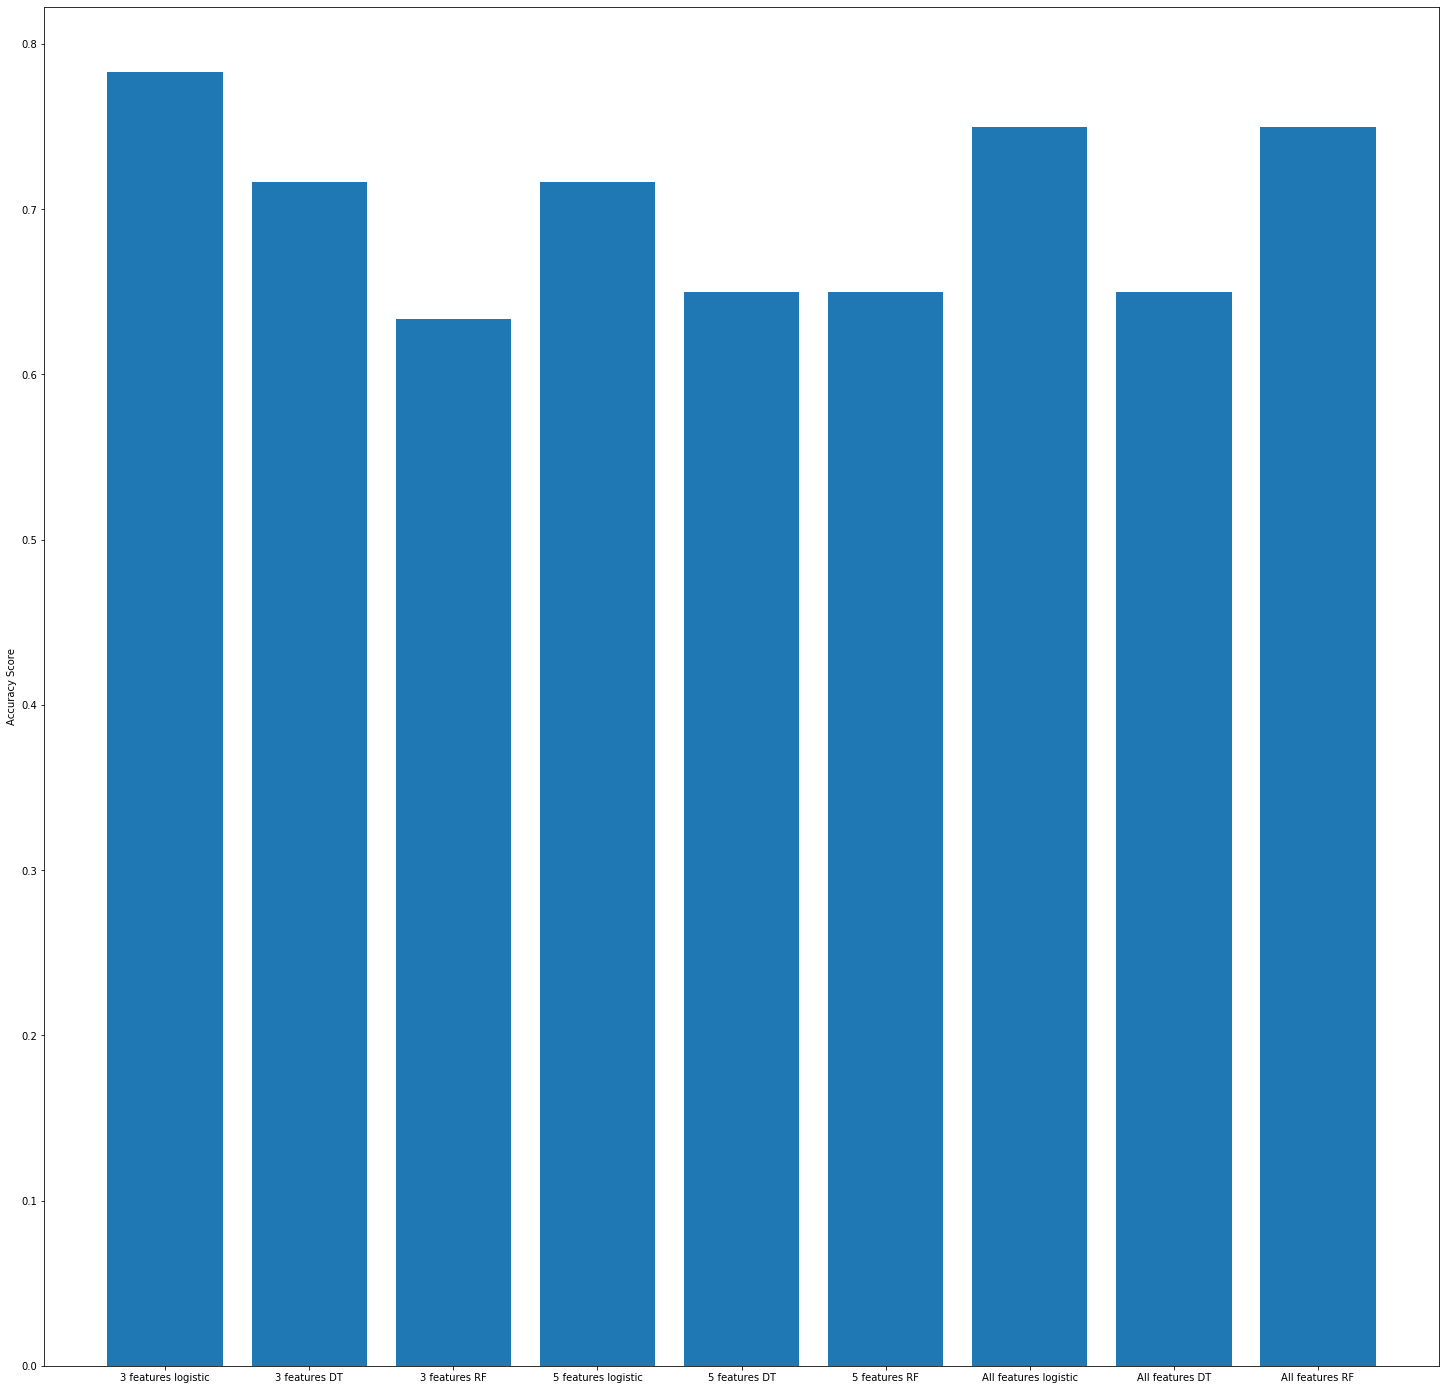

In [56]:
# We have not seen notable improvements in our models at all:
f, ax = plt.subplots(figsize=(25,25))
labels = ["3 features logistic", "3 features DT", "3 features RF", "5 features logistic", "5 features DT", "5 features RF", "All features logistic", "All features DT", "All features RF"]
plt.bar(labels, accuracies)
plt.ylabel("Accuracy Score")
plt.show()
# As we see from this chart, logistic regression with three features has been the best predictor!

In [59]:
# What might be going wrong is our hyperparameter tuning in our decision trees and random forest
# classifer
# Let's try this with our random forest classifier to see if we can improve it's results.
# First, let's get the hyperparameters:
rf = RandomForestClassifier(random_state=1)
params = rf.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [61]:
# Lots to take in there! The sklearn documentation shows us that the most important features are n_estimators
# and max_features, but we'll also experiment with some others: max_leaf_nodes, max_samples,min_samples_leaf
# and min_samples_split

# We'll use Randomized Search cross-validation, for which we will need to create a randomised grid:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 5000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum samples to split a node
min_samples_split = [2, 4, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# We now create our grid of parameters:
grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# Then we use Randomized Search CV to see what the best parameters are
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 60, 110, 161, 211,
                                                         262, 312, 362, 413,
                                                         463, 514, 564, 614,
                                                         665, 715, 766, 816,
                                                         86

In [62]:
# Let's see what the best paramaters are:
rf_random.best_params_

{'n_estimators': 312,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [64]:
# Now we can see if using these parameters improves the accuracy of our model
rf_2 = RandomForestClassifier(n_estimators=312, 
                              min_samples_split=4,
                              min_samples_leaf= 1,
                              max_features= 'sqrt',
                              max_depth=70,
                              bootstrap= True)
rf_2.fit(x_train, y_train)
predictions = rf_2.predict(x_test)
rf_2_accuracy = accuracy_score(predictions, y_test)
print("Tuned model accuracy:", rf_2_accuracy)

Tuned model accuracy: 0.7666666666666667


In [65]:
# This is a small improvement on the average accuracy of the model we saw before. However, we can use 
# GridSearch cross-validation (rather than randomised search) to focus in on certain combinations
# of parameters that we think will produce a good model. We'll need to pass in a new grid, based
# on the one produced by randomised search
from sklearn.model_selection import GridSearchCV
new_grid = {"n_estimators":[262, 282, 312, 332, 352],
            "min_samples_split":[3,4,5],
            "min_samples_leaf": [1,2,3],
            "max_features": ['sqrt'],
            "max_depth": [50, 60, 70, 80, 90],
            "bootstrap": [True]
           }

gridsearch = GridSearchCV(estimator = rf, param_grid = new_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_




Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  2.7min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 312}

In [67]:
# We can see that this has produced slightly a different value for max_depth - we hope this should
# improve our model accuracy to above 0.77%
rf_3 = RandomForestClassifier(n_estimators=312, 
                              min_samples_split=4,
                              min_samples_leaf= 1,
                              max_features= 'sqrt',
                              max_depth=50,
                              bootstrap= True)
rf_3.fit(x_train, y_train)
predictions = rf_3.predict(x_test)
rf_3_accuracy = accuracy_score(predictions, y_test)
print("Tuned model accuracy:", rf_3_accuracy)

Tuned model accuracy: 0.7666666666666667


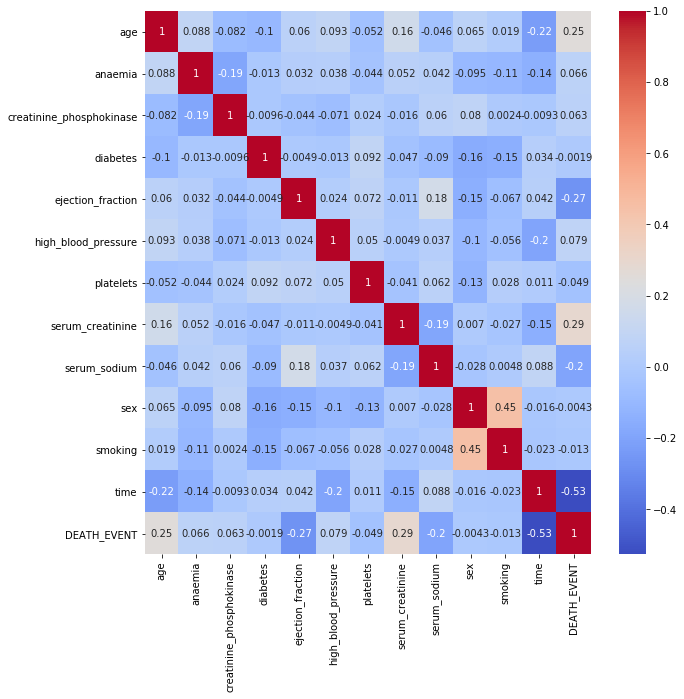

In [68]:
# this is still not improving the accuracy of our model! Another thing that might be confusing things
# are features that simply aren't correlated and so confuse the model. let's plot a correlaion heatmap
# to see where the greatest correlations lie.
plt.figure(figsize=(10,10))
sns.heatmap(patients.corr(), cmap='coolwarm', annot=True)

In [70]:
# We see here that, in fact, there aren't lot of features that correlate strongly with death event,
# either positively or negative. Those that do the most are: 'time','ejection_fraction',
# 'serum_creatinine','age'. Let's see if a model using these features is actually better than what we
# managed before.
features = ['time','ejection_fraction','serum_creatinine','age']
x = patients[features]
y = patients["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)
logistic_2 = LogisticRegression()
logistic_2.fit(x_train, y_train)
predictions = logistic_2.predict(x_test)
accuracy= accuracy_score(predictions, y_test)
print("Accuracy using highly-correlated features:", accuracy)


Accuracy using highly-correlated features: 0.9


In [ ]:
# That's much better! We can see, then, that finding features that are correlated and then modelling
# using those features is all-important when putting together a predictive model.